In [1]:
!pip install opencv-contrib-python --quiet

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img1 = cv2.imread('starbucks1.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('starbucks2.jpg', cv2.IMREAD_GRAYSCALE)

In [13]:
sift = cv2.SIFT_create()

In [14]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [16]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [17]:
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


In [18]:
result_img = cv2.drawMatches(
    img1, keypoints1,
    img2, keypoints2,
    good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)


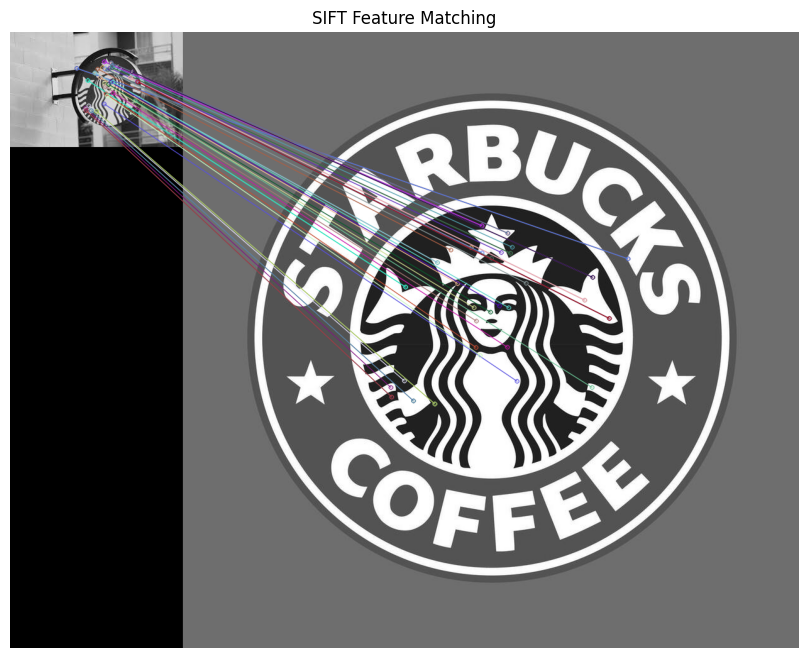

In [19]:
plt.figure(figsize=(15, 8))
plt.imshow(result_img)
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()
